In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

# plt.style.use(['dark_background', 'bmh'])
plt.style.use(['seaborn-v0_8-whitegrid', 'bmh'])
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.rc('axes', facecolor='w')
plt.rc('figure', facecolor='w')
plt.rc('figure', figsize= (6, 3), dpi=150)

In [27]:
def plot_sctter3D(df, key, type):
    x_plot = df['x']
    y_plot = df['y']

    i_case = df.columns.get_loc(key)
    tmp = df.iloc[:, i_case]
            
    fig = plt.figure(figsize = (5, 5), facecolor='w', dpi = 150)
    ax = plt.axes(projection ='3d', facecolor='w')
    for y_ind in y_plot.unique():
        ind_ = (y_plot == y_ind)
        markerline, stemlines, baseline = ax.stem(x_plot[ind_], y_plot[ind_], tmp[ind_],
                                                markerfmt = '.')
        plt.setp(stemlines, 'alpha', 0.4)
        ax.scatter(x_plot[ind_], y_plot[ind_], tmp[ind_], c = tmp[ind_], edgecolors = 'k', s = 50)
        
    for x_ind in x_plot.unique():
        ind_ = (x_plot == x_ind)
        markerline, stemlines, baseline = ax.stem(x_plot[ind_], y_plot[ind_], tmp[ind_],
                                                markerfmt = '.')
        plt.setp(stemlines, 'alpha', 0.4)
        ax.scatter(x_plot[ind_], y_plot[ind_], tmp[ind_], c = tmp[ind_], edgecolors = 'k', s = 50)
    
    ax.set_title(f'strain of {type} at {100*(i_case + 1)} KN (unit: $\mu m$)')
    ax.set_xlabel(f'x (unit: mm)')
    ax.set_ylabel(f'y (unit: mm)')
    ax.set_yticks(y_plot.unique())
    ax.set_xlim(0, df['x'].max())
    ax.set_ylim(0, df['y'].max())
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    plt.show()


def check_each_rawdata_by_image(data, key):
    import os
    import imageio
    dir_sv_fig = './img'
    os.makedirs(dir_sv_fig, exist_ok = True)

    def create_frame(t):
        plt.plot(data.iloc[:, t])
        plt.title(f'{key} #{t}', fontsize=14)
        plt.savefig(f'./img/img_{t}.png', 
                    transparent = False,  
                    facecolor = 'w')
        plt.close()

    for t in range(len(data.columns)):
        create_frame(t)

    frames = []
    for t in range(len(data.columns)):
        image = imageio.v2.imread(f'./img/img_{t}.png')
        frames.append(image)

    imageio.mimsave(f'./{key}.gif', # output gif
                    frames,          # array of input frames
                    fps = 1)         # optional: frames per second


## **1. BOCDA**
#### **1.1 Import raw data**

In [28]:
# Index of CFRP Bar for BOCDA
bit_x = np.array([
    [35, 95 + 1],
    [175, 235 + 1],
    [310, 370 + 1],
    [453, 513 + 1],
    [593, 653 + 1],
]) - 1

x_loc, y_loc = {}, {}
x_loc['LF'] = np.arange(0, 50 * (bit_x[0, 1] - bit_x[0, 0]), 50)
y_loc['LF'] = np.arange(300, 3000 , 600)
print(x_loc['LF'].shape)
x_loc['LF']

bit_x[:, 1] - bit_x[:, 0]

(61,)


array([61, 61, 61, 61, 61])

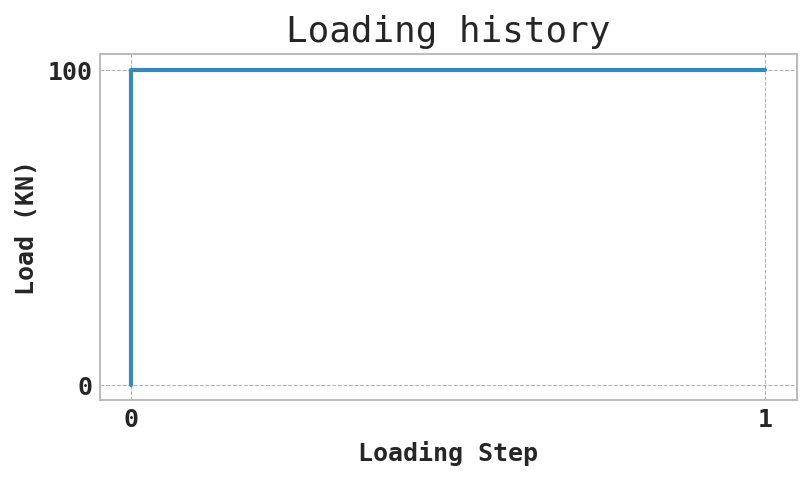

In [29]:
n_load_level = 2
x = np.arange(0, n_load_level)
y = np.arange(0, n_load_level * 100, 100)
plt.step(x, y)
plt.xlabel('Loading Step')
plt.ylabel('Load (KN)')
plt.title('Loading history')
plt.xticks(x)
plt.yticks(y)
plt.show()

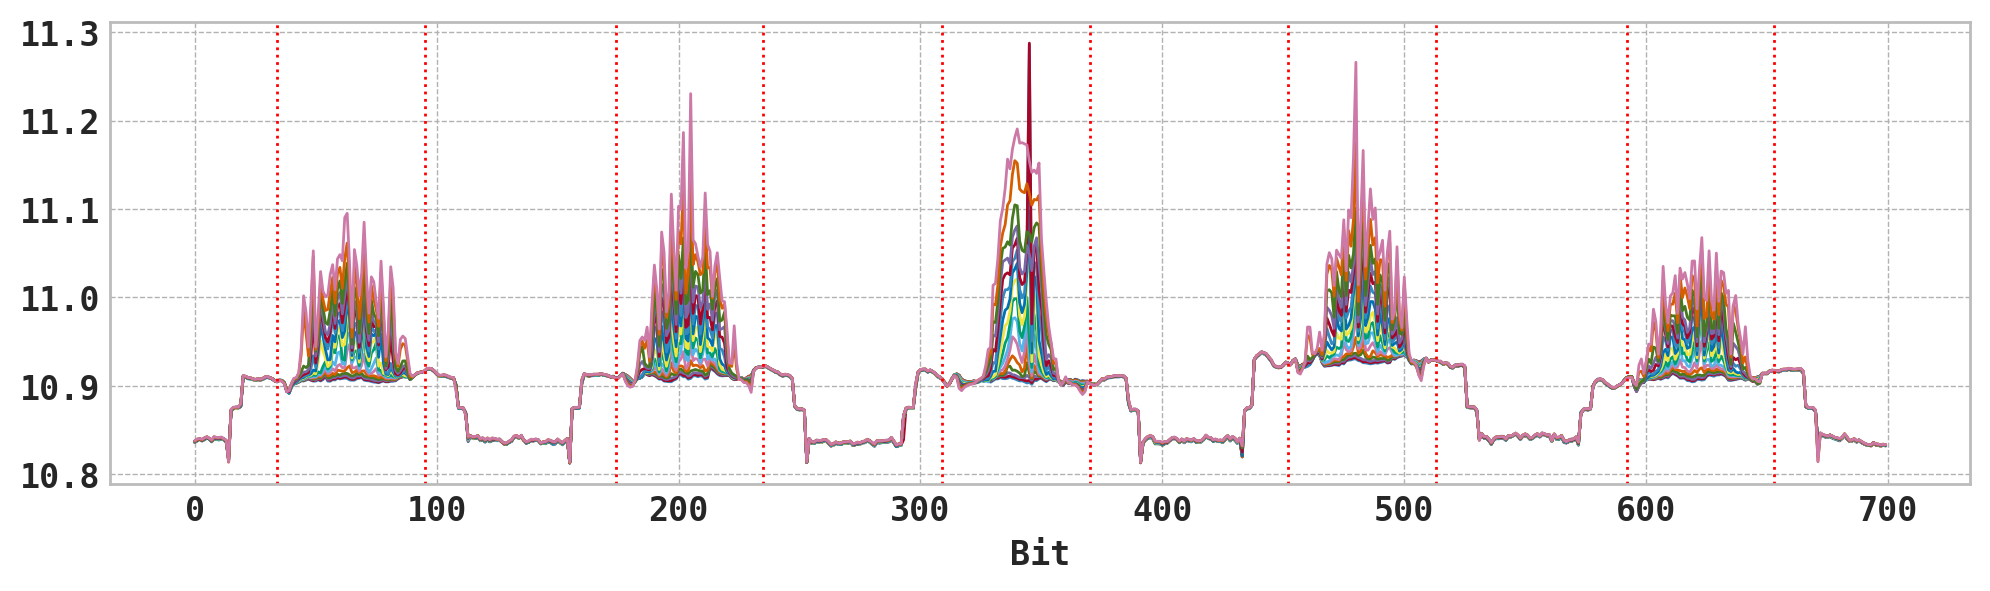

In [30]:
df, y_final = [], []
fn_list = [
    './rawdata/#0000KN.txt',
    './rawdata/#0050KN.txt',
    './rawdata/#0100KN.txt',
    './rawdata/#0150KN.txt',
    './rawdata/#0200KN.txt',
    './rawdata/#0250KN.txt',
    './rawdata/#0300KN.txt',
    './rawdata/#0350KN.txt',
    './rawdata/#0400KN.txt',
    './rawdata/#0450KN.txt',
    './rawdata/#0500KN.txt',
    './rawdata/#0550KN.txt',
    './rawdata/#0600KN.txt',
    './rawdata/#0650KN.txt',
    './rawdata/#0700KN.txt',
    './rawdata/#0750KN.txt',
    ]

plt.figure(figsize = (12, 3), dpi = 200)

for i0, fn in enumerate(fn_list):
    data = pd.read_csv(fn, sep = '\t')
    data.drop(['Bit'], axis = 1, inplace = True)
    df.append(data)
    
    x0 = np.arange(0, len(data.columns)).reshape(-1, 1)
    y = data.values.T
    if i0 == 0:
        y_med = np.median(y, axis = 1).reshape(-1, 1)
    else:
        y_med = np.concatenate((y_med, np.median(y, axis = 1).reshape(-1, 1)), axis = 1)
    y_final.append(y_med)
    
    plt.plot(y_med[:, i0], linewidth = 1)
    
ymin, ymax = plt.gca().get_ylim()
for bit_x_ in bit_x:
    plt.vlines(bit_x_[0], ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
    plt.vlines(bit_x_[1], ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
    
plt.ylim(ymin, ymax)
    # ax.set_title(f'Brillouin Frequency (Unit: GHz) [{i0*100} KN]')
    
plt.xlabel('Bit')
plt.show()

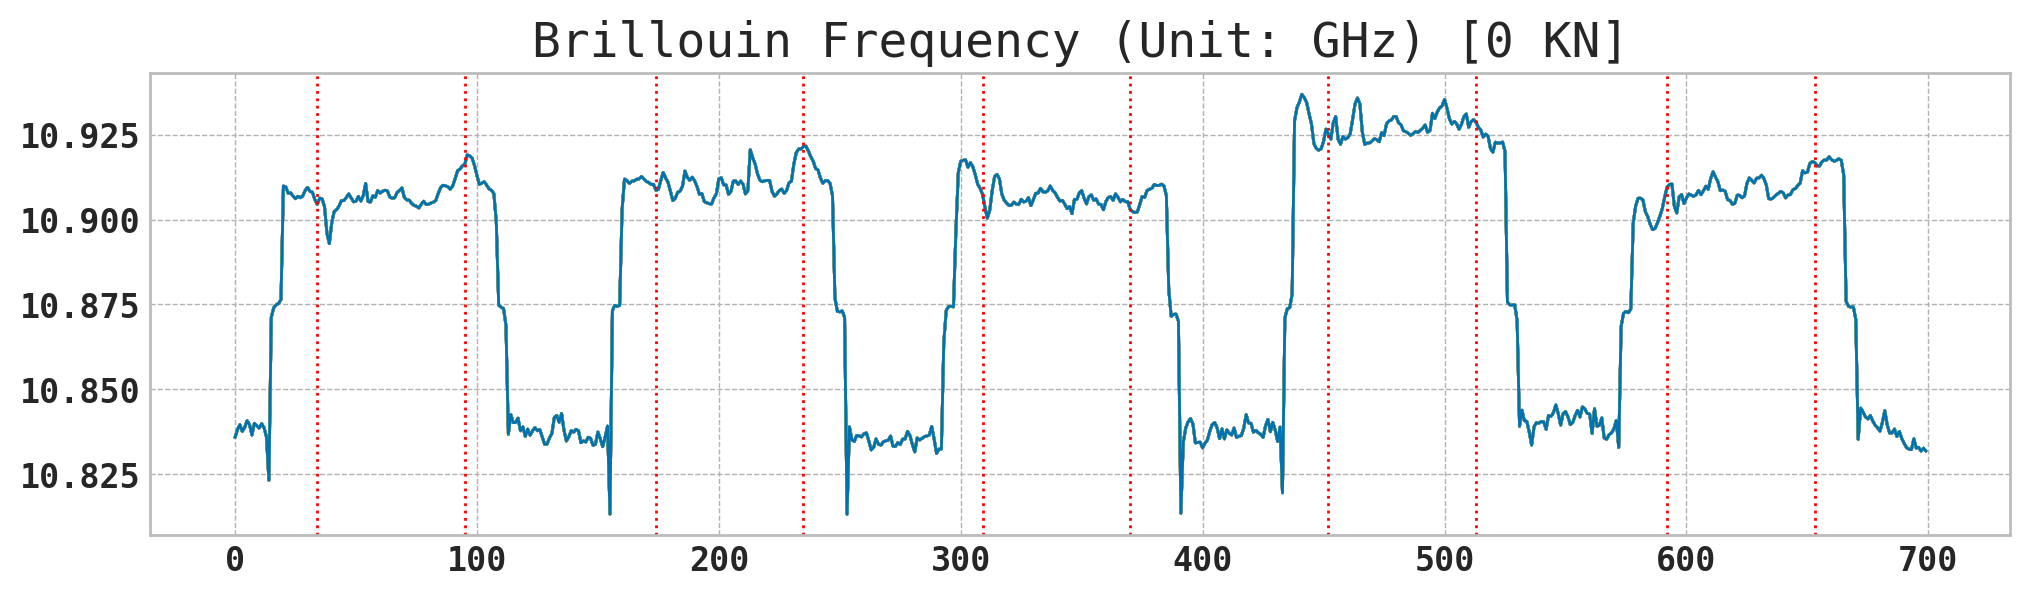

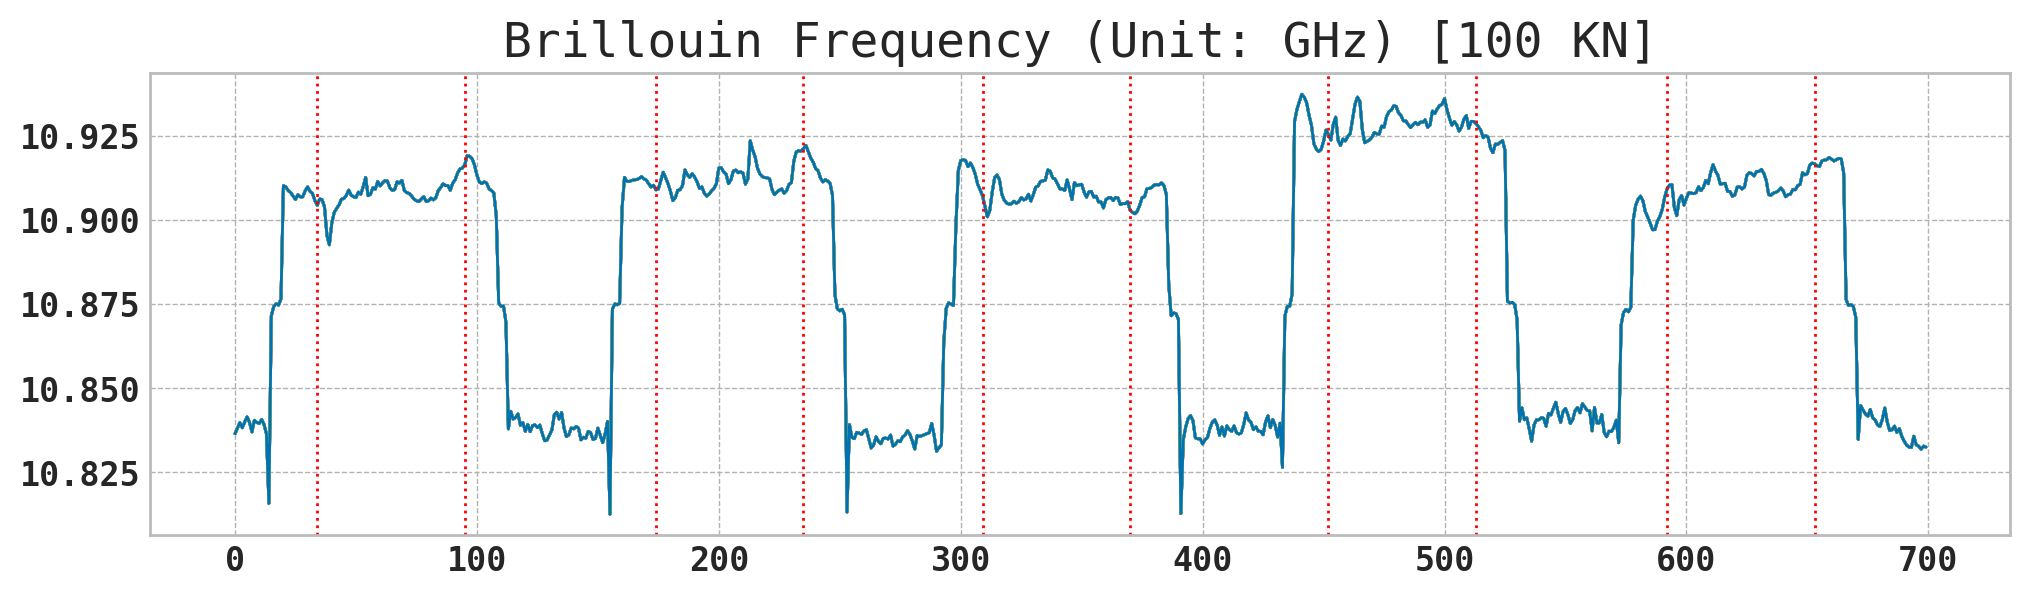

In [31]:
df, y_final = [], []
fn_list = [
    f'./rawdata/#0000KN.txt',
    f'./rawdata/#0100KN.txt',]

for i0, fn in enumerate(fn_list):
    data = pd.read_csv(fn, sep = '\t')
    data.drop(['Bit'], axis = 1, inplace = True)
    df.append(data)
    
    x0 = np.arange(0, len(data.columns)).reshape(-1, 1)
    y = data.values.T
    if i0 == 0:
        y_med = np.median(y, axis = 1).reshape(-1, 1)
    else:
        y_med = np.concatenate((y_med, np.median(y, axis = 1).reshape(-1, 1)), axis = 1)
    y_final.append(y_med)

    if 1:
        fig, ax = plt.subplots(1, 1, figsize = (12, 3), dpi = 200)
        for i in range(y.shape[1]):
            ax.plot(y_med[:, i0], linewidth = 1)
        
        ymin, ymax = ax.get_ylim()[0], ax.get_ylim()[1]
        for bit_x_ in bit_x:
            ax.vlines(bit_x_[0], ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
            ax.vlines(bit_x_[1], ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
            
        ax.set_ylim(ymin, ymax)
        ax.set_title(f'Brillouin Frequency (Unit: GHz) [{i0*100} KN]')
        if i0 == 3:
            ax.set_xlabel('Bit')
        plt.show()

    else:
        fig, ax = plt.subplots(1, 2, figsize = (12, 3), dpi = 200)
        for i in range(y.shape[1]):
            ax[0].plot(y[:, i], linewidth = 1)
            ax[1].plot(y_med[:, i0], linewidth = 1)
        
        ymin, ymax = ax[0].get_ylim()[0], ax[0].get_ylim()[1]
        for bit_x_ in bit_x:
            ax[0].vlines(bit_x_[0], ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
            ax[0].vlines(bit_x_[1], ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)

            ax[1].vlines(bit_x_[0], ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
            ax[1].vlines(bit_x_[1], ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
        
        ax[0].set_ylim(ymin, ymax)
        ax[1].set_ylim(ymin, ymax)    
        ax[0].set_title(f'Raw data [{i0*50} KN]')
        ax[1].set_title(f'Brillouin Frequency (Unit: GHz) [{i0*100} KN]')
        plt.show()

#### **2.2 Compute Strains**

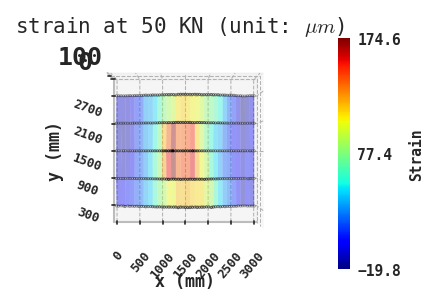

In [32]:
df = pd.DataFrame(y_med)
df.index = x0.reshape(-1, )
df.columns = ['0 KN', '100 KN']

df_strain = pd.DataFrame()
for ind in range(1, df.shape[1]):
    strain_ = (df.iloc[:, ind] - df.iloc[:, 0]) * 2e4 # BOCDA => strain 
    df_strain = pd.concat([df_strain, strain_], axis = 1)

df_strain.index = df.index
df_strain.columns = [f'{i*50} KN' for i in range(1, y_med.shape[1])]
x_plot, y_plot = np.meshgrid(x_loc['LF'], y_loc['LF'])

for i_case in range(df_strain.shape[1]):
    for ind in range(bit_x.shape[0]):
        if ind == 0:
            tmp_array = df_strain.iloc[bit_x[ind, 0]:bit_x[ind, 1], i_case].values[::-1].reshape(-1, 1)
            tmp  = df_strain.iloc[bit_x[ind, 0]:bit_x[ind, 1], i_case].values[::-1].reshape(-1, 1)
            x = x_loc['LF'].reshape(-1, 1)
            y = y_loc['LF'][ind] * np.ones_like(x)
            
        else:
            if ind % 2 == 0:
                tmp_ = df_strain.iloc[bit_x[ind, 0]:bit_x[ind, 1], i_case].values[::-1].reshape(-1, 1)
                x_ = x_loc['LF'][::-1].reshape(-1, 1)
                y_ = y_loc['LF'][ind] * np.ones_like(x_)
            else:
                tmp_ = df_strain.iloc[bit_x[ind, 0]:bit_x[ind, 1], i_case].values.reshape(-1, 1)
                x_ = x_loc['LF'].reshape(-1, 1)
                y_ = y_loc['LF'][ind] * np.ones_like(x_)
            
            tmp_array = np.concatenate([tmp_array, tmp_], axis = 1)
            tmp = np.concatenate([tmp, tmp_], axis = 0)
            x = np.concatenate([x, x_], axis = 0)
            y = np.concatenate([y, y_], axis = 0)

    pd.DataFrame(tmp.T).to_csv(f'./rawdata/strain_BOCDA_{i_case + 1}00KN.csv') # for plotting
    if 1:
        import matplotlib as mpl
        
        fig = plt.figure(figsize = (7, 2), facecolor='w', dpi = 150)        
        ax1 = fig.add_subplot(111, projection ='3d', facecolor='w')
        ax1.plot_surface(x_plot, y_plot, tmp_array.T, alpha=0.4, cmap=cm.jet)
        ax1.scatter(x_plot, y_plot, tmp_array.T, c = tmp_array.T, edgecolors = 'k', s = 1)
        ax1.set_title(f'strain at {(i_case + 1)*50} KN (unit: $\mu m$) ', pad = -50, fontsize = 10)
        ax1.set_xlabel(f'x (mm)', fontsize = 8)
        ax1.set_ylabel(f'y (mm)', fontsize = 8)
        ax1.set_xlim(0, 3000)
        ax1.set_ylim(0, 3000)
        ax1.set_zlim((tmp_array.min(), tmp_array.max()))
        ax1.tick_params(axis='x', labelsize=6, rotation = 50)
        ax1.tick_params(axis='y', labelsize=6, rotation = -20)
        ax1.xaxis.labelpad = 5
        ax1.yaxis.labelpad = 5
        ax1.set_yticks(y_loc['LF'])
        ax1.view_init(90, -90)
        # ax1.view_init(60, 0)
    
        cmap = cm.jet ## 또는 plt.cm.get_cmap('bwr')
        # cmap = cmap.reversed() ## 색상을 반대로 적용하기
        vmax = tmp_array.max()
        vmin = tmp_array.min()
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        colormapping = cm.ScalarMappable(norm=norm, cmap=cmap)
        cbar = fig.colorbar(colormapping, ax=ax1) ## 컬러바 삽입
        cbar.ax.tick_params(labelsize=7)
        cbar.set_label('Strain', fontsize = 7) ## 컬러바 라벨
        cbar.set_ticks([vmin, 0.5*(vmin+vmax), vmax]) ## 컬러바 눈금 좌표 설정    
        cbar.ax.spines['outline'].set_visible(False) ## 컬러바 테두리 제거
        cbar.ax.tick_params(size=0) ## 눈금 제거
        plt.show()
        
    if i_case == 0:
        tmp_mat = tmp
    else:
        tmp_mat = np.concatenate([tmp_mat, tmp], axis = 1)


strain = {}
strain['LF0'] = pd.DataFrame(np.concatenate([tmp_mat, x, y], axis = 1))
strain['LF0'].columns = [i for i in range(tmp_mat.shape[1])] + ['x', 'y']
strain['LF0'].to_csv('slab2_strain_LF0.csv', index = False)

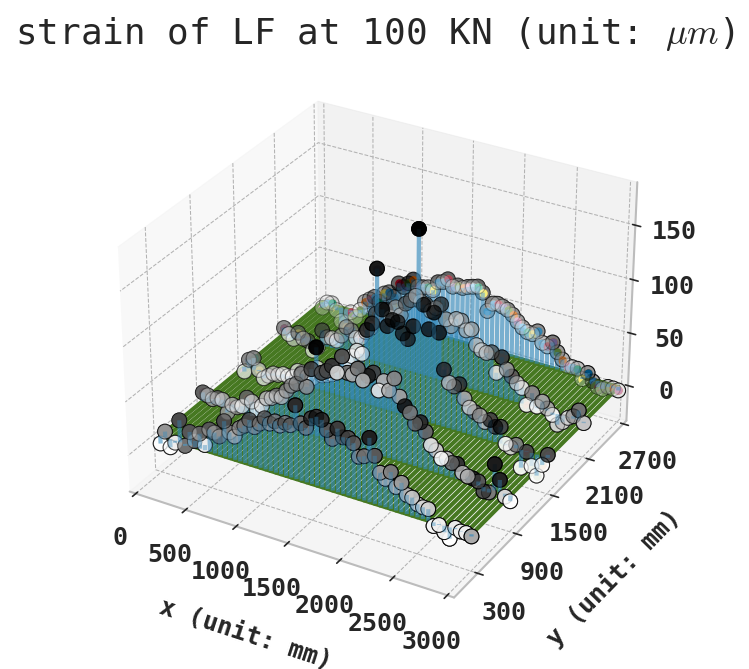

In [33]:
# plot strains in each loading cases
for i in range(strain['LF0'].shape[1] - 2):
    plot_sctter3D(strain['LF0'], i, 'LF')
    plt.show()

## **2. FBG**
#### **2.1 Import raw data**

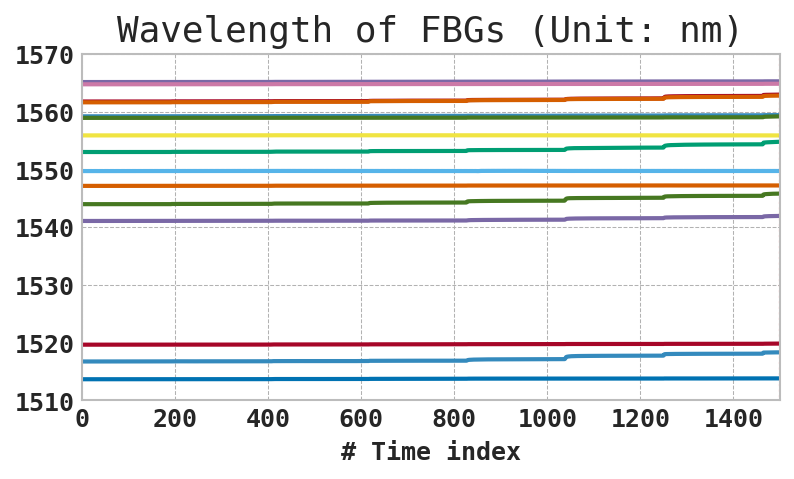

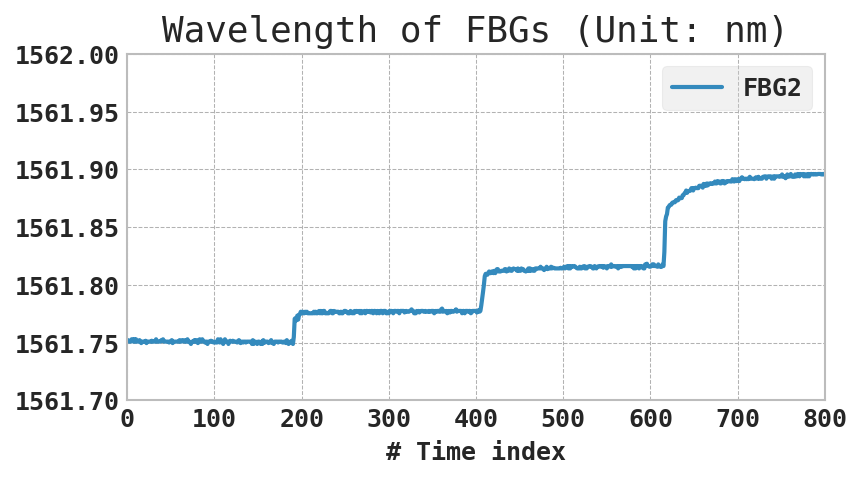

In [34]:
# Import raw data
fn = './rawdata/FBG.xlsx'
df = pd.read_excel(fn, header=None)
df = df.iloc[:,  np.arange(6, df.shape[1])]
df.columns = np.arange(0, df.shape[1])

# Extract raw data before first failure of GFRP Rod
ind_x = df.shape[0]
ind_x = 1500
for idx, col in enumerate(df.columns):
    plt.plot(df[col], label = f'{idx}')
ymin, ymax = plt.gca().get_ylim()
plt.vlines(ind_x, ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
plt.title('Wavelength of FBGs (Unit: nm)')
plt.xlabel('# Time index')
plt.xlim(0, ind_x)
plt.ylim(1510, 1570)
plt.show()

if 1:
    plt.plot(df.iloc[:, 1], label = f'FBG{df.columns[1]+1}')
    ymin, ymax = plt.gca().get_ylim()
    plt.vlines(ind_x, ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
    plt.title('Wavelength of FBGs (Unit: nm)')
    plt.xlabel('# Time index')
    plt.xlim(0, 800)
    plt.ylim(1561.7, 1562)
    plt.legend(frameon = True, facecolor = 'lightgrey', framealpha=0.3, prop=dict(weight='bold'))
    plt.show()


for ind in range(len(df.columns)):
    if ind == 0:
        data = df.iloc[:ind_x, ind]
    else:
        data_ = df.iloc[:ind_x, ind]
        data = pd.concat([data, data_], axis = 1)

# check_each_rawdata_by_image(data, 'FBG')

#### **2.2 Define x- & y-coordinate**

In [35]:
y_loc['HF'] = np.arange(300, 600*(5 + 1), 600)
x_loc['HF'] = np.arange(0, 750*(3 + 1), 750)
x_loc['HF'].shape

# Index of CFRP Bar for BOCDA
time_interval = np.array([
    [140, 190],
    # [330, 380],
    [550, 600],
    # [750, 800],
]) - 1

for i in range(len(data.columns)):
    for j in range(time_interval.shape[0]):
        if j == 0:
            mu = data.iloc[time_interval[j, 0]:time_interval[j, 1]+1, i].mean().reshape(-1, 1)
        else:
            mu_ = data.iloc[time_interval[j, 0]:time_interval[j, 1]+1, i].mean().reshape(-1, 1)
            mu = np.concatenate([mu, mu_], axis = 0)
    
    if i == 0:
        FBG0 = pd.DataFrame(mu)
    else:
        FBG0 = pd.concat((FBG0, pd.DataFrame(mu)), axis = 1)

FBG0.columns = np.arange(0, len(data.columns))

#### **2.3 Compute Strains**

In [36]:
# Select FBGs of having good signals
# FBGs_ok = [0, 1, 2, 3, 4, 5, 12, 13, 14, 6, 7, 8, 9, 10, 11] # ok
FBGs_ok = [9, 10, 11, 3, 4, 5, 12, 13, 14, 6, 7, 8, 0, 1, 2]

for ind in range(1, FBG0.shape[0]):
    if ind == 1:
        tmp = (-1/0.78*(1 - FBG0.iloc[ind, :]/FBG0.iloc[0, :]))* 1e6
    else:
        tmp_ = (-1/0.78*(1 - FBG0.iloc[ind, :]/FBG0.iloc[0, :]))* 1e6
        tmp = pd.concat([tmp, tmp_], axis = 1)

strain['HF'] = tmp.iloc[FBGs_ok]
strain['HF'].index = [i for i in range(strain['HF'].shape[0])]
# Add x- & y-coordinate
x_tmp, y_tmp = [], []
for ind in range(strain['HF'].shape[0]):
    x_tmp.append(x_loc['HF'][ind%3])
    y_tmp.append(y_loc['HF'][ind//3])

strain['HF'] = pd.concat([strain['HF'], pd.DataFrame(x_tmp)], axis = 1)
strain['HF'] = pd.concat([strain['HF'], pd.DataFrame(y_tmp)], axis = 1)
strain['HF'].columns = [0] + ['x', 'y']
strain['HF'].to_csv('slab2_strain_HF.csv', index = False)
strain['HF'].iloc[1::3, :]


,0,x,y
1,60.442194,750,300
4,76.403231,750,900
7,97.142692,750,1500
10,64.969761,750,2100
13,53.785158,750,2700


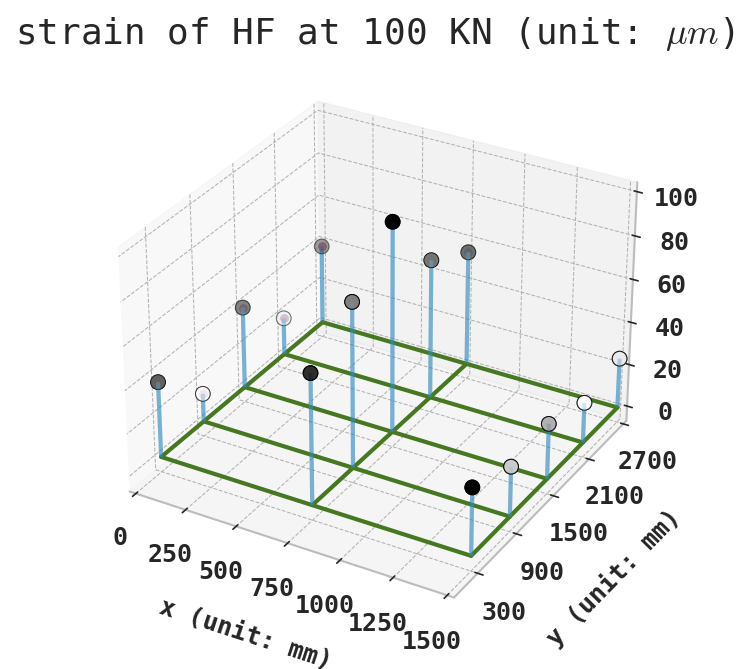

[FBG] # of points : 15


In [37]:
# plot strains in each loading cases
for i in range(strain['HF'].shape[1] - 2):
    plot_sctter3D(strain['HF'], i, 'HF')
    print("[FBG] # of points :", strain['HF'].shape[0])
    plt.show()

## **3. TDS**
#### **3.1 Import raw data**

In [38]:
# # Import raw data
# fn = './rawdata/TDS.xlsx'
# df = pd.read_excel(fn, skiprows=2, header=None)
# df = df.iloc[:,  np.arange(5, df.shape[1])]
# df.columns = np.arange(0, df.shape[1])

# # Extract raw data before first failure of GFRP Rod
# ind_x = 800
# for col in df.columns:
#     plt.plot(df[col])
# ymin, ymax = plt.gca().get_ylim()
# plt.vlines(ind_x, ymin = ymin, ymax = ymax, linestyles = ':', color = 'r', linewidth = 1)
# plt.title('Strains of TDS (Unit: $\mu m$)')
# plt.xlabel('# Time index')
# plt.xlim(0, ind_x)
# plt.ylim(0, 1300)
# plt.show()

# for ind in range(len(df.columns)):
#     if ind == 0:
#         data = df.iloc[:ind_x, ind]
#     else:
#         data_ = df.iloc[:ind_x, ind]
#         data = pd.concat([data, data_], axis = 1)

# # check_each_rawdata_by_image(data, 'TDS')

#### **3.2 Define x- & y-coordinate**

In [39]:
# y_loc['TDS'] = np.arange(300, 600*(5 + 1), 600)
# x_loc['TDS'] = np.arange(0, 750*(3 + 1), 750)
# x_loc['TDS'].shape

# # Index of CFRP Bar for BOCDA
# time_interval = np.array([
#     [140, 190],
#     [330, 380],
#     [550, 600],
#     [750, 800],
# ]) - 1

# for i in range(len(data.columns)):
#     for j in range(time_interval.shape[0]):
#         if j == 0:
#             mu = data.iloc[time_interval[j, 0]:time_interval[j, 1]+1, i].mean().reshape(-1, 1)
#         else:
#             mu_ = data.iloc[time_interval[j, 0]:time_interval[j, 1]+1, i].mean().reshape(-1, 1)
#             mu = np.concatenate([mu, mu_], axis = 0)
    
#     if i == 0:
#         TDS0 = pd.DataFrame(mu)
#     else:
#         TDS0 = pd.concat((TDS0, pd.DataFrame(mu)), axis = 1)

# TDS0.columns = np.arange(0, len(data.columns))

#### **3.3 Compute Strains**

In [40]:
# # Select FBGs of having good signals
# DTS_ok = [0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14]
# ref = TDS0.iloc[0, :]

# for ind in range(1, TDS0.shape[0]):
#     if ind == 1:
#         tmp = TDS0.iloc[ind, :] - TDS0.iloc[0, :]
#     else:
#         tmp_ = TDS0.iloc[ind, :] - TDS0.iloc[0, :]
#         tmp = pd.concat([tmp, tmp_], axis = 1)

# strain['TDS'] = pd.DataFrame(tmp)

# # Add x- & y-coordinate
# x_tmp, y_tmp = [], []
# for ind in range(strain['TDS'].shape[0]):
#     x_tmp.append(x_loc['TDS'][ind%3])
#     y_tmp.append(y_loc['TDS'][ind//3])

# strain['TDS'] = pd.concat([strain['TDS'], pd.DataFrame(x_tmp)], axis = 1)
# strain['TDS'] = pd.concat([strain['TDS'], pd.DataFrame(y_tmp)], axis = 1)
# strain['TDS'].columns = [i for i in range(tmp.shape[1])] + ['x', 'y']
# strain['TDS'] = strain['TDS'].iloc[DTS_ok, :]
# strain['TDS'].to_csv('strain_DTS.csv')
# strain['TDS']


In [41]:
# # plot strains in each loading cases
# for i in range(strain['TDS'].shape[1] - 2):
#     plot_sctter3D(strain['TDS'], i, 'TDS')

## **4. Check data and save targets**

In [42]:
# Find the best regions where matches well to FBG
def match_LF_and_HF_starting_point(strain, y_target, LF_SR):
    from scipy import spatial

    r2 = False

    df_LF = strain['LF0'].loc[round(strain['LF0']['y'], 2) == round(y_target, 2)]
    df_HF = strain['HF'].loc[round(strain['HF']['y'], 2) == round(y_target, 2)]

    interval_ind_HF =(df_HF['x'].unique()/LF_SR).astype(int)
    print(interval_ind_HF.shape)
    print(interval_ind_HF)
    i_shift, R2_all = 0, []
    stop_flag = 1

    while stop_flag:
        R2_tmp = []
        for ind_case in range(df_LF.shape[1]-2):
            HF_eval = df_HF.iloc[:, ind_case]
            LF_eval = df_LF.iloc[interval_ind_HF + i_shift, ind_case]
            
            if r2:
                R2_tmp.append(np.corrcoef(HF_eval, LF_eval)[0][1])
            else:
                R2_tmp.append(1 - spatial.distance.cosine(HF_eval, LF_eval))

        R2_all.append(R2_tmp)
        i_shift = i_shift + 1
        if (df_LF.shape[0] - interval_ind_HF[-1] - i_shift) == 0:
            stop_flag = 0

    R2_ = np.array(R2_all)
    R2 = (R2_ - R2_.min(axis = 0))/(R2_.max(axis = 0) - R2_.min(axis = 0))
    # print(R2)
    idx_best = []
    idx_best.append(y_target)
    R2 = R2[:, -1]
    print(type(R2))
    print(R2.shape)
    idx_best.append(R2.argmax(axis = -1))
    # idx_best.append(R2.prod(axis = 1).argmax())
    idx_best.append(idx_best[1] + interval_ind_HF[-1]+1)
    
    plt.plot(R2)
    plt.plot(idx_best[1], R2[idx_best[1]], 'ro')
    plt.suptitle(f'best lag = {idx_best[1]} (y = {y_target})')
    plt.show()

    return idx_best, R2_

In [43]:
LF_SR, FBG_SR = 50, 750

idx_bests, r2_all = [], []
for y_target in strain['HF']['y'].unique():
    if y_target in [300, 900, 1500, 2100, 2700]: # 900, 1500, 2100,
        df_BOCDA = strain['LF0'].loc[round(strain['LF0']['y'], 2) == round(y_target, 2)]
        idx_tmp = [
            y_target,
            int(df_BOCDA.values.argmax(axis = 0)[0] - FBG_SR/LF_SR),
            int(df_BOCDA.values.argmax(axis = 0)[0] + FBG_SR/LF_SR + 1),]
        R2_tmp = None
        idx_bests.append(idx_tmp)
        r2_all.append(R2_tmp)
    else:
        idx_tmp, R2_tmp = match_LF_and_HF_starting_point(strain, y_target, LF_SR)
        idx_bests.append(idx_tmp)
        r2_all.append(R2_tmp)
idx_bests

[[300, 12, 43], [900, 8, 39], [1500, 10, 41], [2100, 12, 43], [2700, 13, 44]]

In [44]:
# Extract the matched regions
for indx, ind_best in enumerate(idx_bests):
    df = strain['LF0'].loc[round(strain['LF0']['y'], 2) == round(ind_best[0], 2)]
    tmp = df.iloc[ind_best[1]:ind_best[2], :]
    tmp['x'] = np.arange(0, (tmp.shape[0])*50, 50)

    if indx == 0:
        df_extracted = tmp.values
    else:
        df_extracted_ = tmp.values
        df_extracted = np.concatenate([df_extracted, df_extracted_], axis = 0)

df = pd.DataFrame(df_extracted)
df.columns = strain['LF0'].columns

# plot strains in each loading cases
# for i in range(df.shape[1] - 2):
    # plot_sctter3D(df, i, 'BOCDA')

strain['LF'] = df
strain['LF'].to_csv('slab2_strain_LF.csv', index = False)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_39184\597208392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['x'] = np.arange(0, (tmp.shape[0])*50, 50)


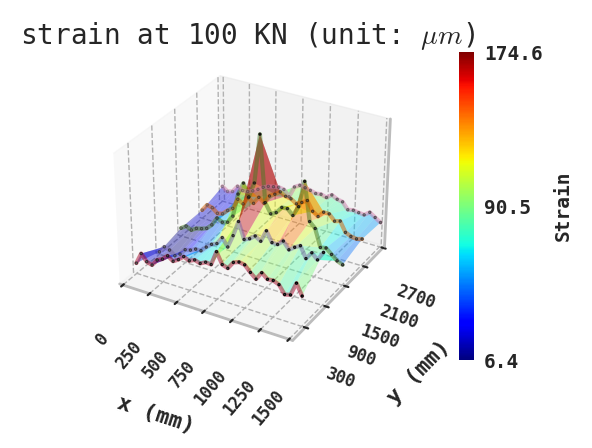

In [45]:
import matplotlib as mpl
for i_case in range(strain['LF'].shape[1] - 2):
    x_plot0 = strain['LF']['x'].unique()
    y_plot0 = strain['LF']['y'].unique()
    tmp = strain['LF'].iloc[:, i_case]

    x_plot, y_plot = np.meshgrid(x_plot0, y_plot0)
    tmp_array = strain['LF'].iloc[:, i_case].values.reshape(y_plot0.shape[0], x_plot0.shape[0])

    fig = plt.figure(figsize = (7, 2), facecolor='w', dpi = 200)
    ax1 = fig.add_subplot(111, projection ='3d', facecolor='w')
    ax1.plot_surface(x_plot, y_plot, tmp_array, alpha=0.4, cmap=cm.jet)
    
    for y_ind in y_plot0:
        ind_ = (strain['LF']['y'] == y_ind)
        ax1.plot(strain['LF']['x'].loc[ind_], strain['LF']['y'].loc[ind_], tmp[ind_],
                '-', alpha = 0.5, linewidth = 1.5)
    ax1.scatter(x_plot, y_plot, tmp_array, c = tmp_array, edgecolors = 'k', s = 0.5)
    
    ax1.set_title(f'strain at {(i_case + 1)*100} KN (unit: $\mu m$) ', pad = -50, fontsize = 10)
    ax1.set_xlabel(f'x (mm)', fontsize = 8)
    ax1.set_ylabel(f'y (mm)', fontsize = 8)
    ax1.set_xlim((0, x_plot.max()))
    ax1.set_ylim((0, tmp_array.max()))
    ax1.set_zlim((tmp_array.min(), tmp_array.max()))
    ax1.tick_params(axis='x', labelsize=6, rotation = 50)
    ax1.tick_params(axis='y', labelsize=6, rotation = -20)
    ax1.set_zticks([])
    ax1.xaxis.labelpad = 5
    ax1.yaxis.labelpad = 5
    ax1.set_yticks(y_plot0)
    # ax1.view_init(90, -90)

    cmap = cm.jet ## 또는 plt.cm.get_cmap('bwr')
    # cmap = cmap.reversed() ## 색상을 반대로 적용하기
    vmax = tmp_array.max()
    vmin = tmp_array.min()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colormapping = cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = fig.colorbar(colormapping, ax=ax1) ## 컬러바 삽입
    cbar.ax.tick_params(labelsize=7)
    cbar.set_label('Strain', fontsize = 7) ## 컬러바 라벨
    cbar.set_ticks([vmin, 0.5*(vmin+vmax), vmax]) ## 컬러바 눈금 좌표 설정    
    cbar.ax.spines['outline'].set_visible(False) ## 컬러바 테두리 제거
    cbar.ax.tick_params(size=0) ## 눈금 제거
    plt.show()

In [46]:
# Set target values
df = strain['LF']
tmp_list = []
for idx, (x_, y_) in enumerate(zip(strain['HF']['x'].values, strain['HF']['y'].values)):
        Index_label1 = df[df['x'] == x_].index.tolist()
        Index_label2 = df[df['y'] == y_].index.tolist()
        Index_final = np.intersect1d(Index_label1, Index_label2)
        print(x_, y_)
        
        if len(Index_final): # avoid breaking loop due to error (i.e., missing points)
            tmp = df.loc[Index_final].iloc[:, :-2].values.reshape(-1).tolist()
            tmp.extend(strain['HF'].iloc[idx, :-2].values.reshape(-1))
            tmp_list.append(tmp)

tmp_list = np.concatenate([
    np.array(tmp_list),
    strain['HF']['x'].values.reshape(-1, 1),
    strain['HF']['y'].values.reshape(-1, 1),], axis = 1)
df_test_set = pd.DataFrame(tmp_list)

n_case = int((tmp_list.shape[1]-2)/2)
df_test_set.columns = [f'LF{i}' for i in range(n_case)] + [f'HF{i}' for i in range(n_case)] + ['x', 'y']

df_test_set.to_csv('slab2_strain_shared.csv', index = False)

0 300
750 300
1500 300
0 900
750 900
1500 900
0 1500
750 1500
1500 1500
0 2100
750 2100
1500 2100
0 2700
750 2700
1500 2700


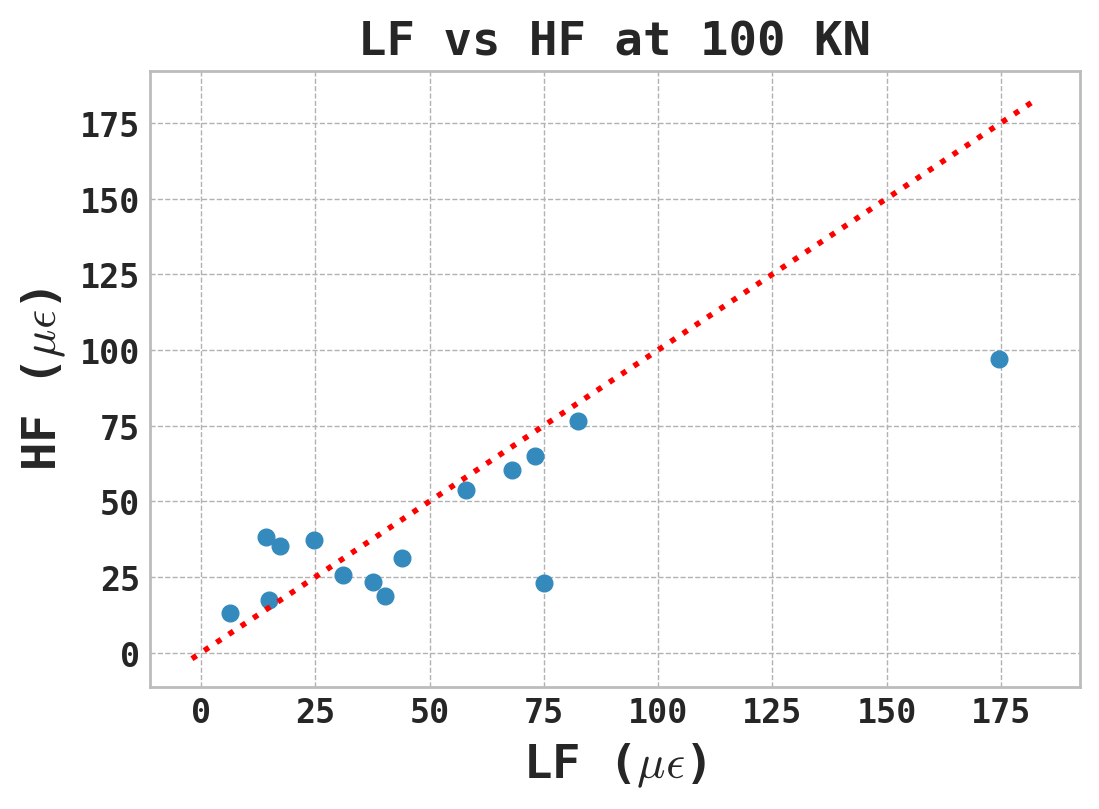

In [47]:
# Check corss-correlation
plt.figure(figsize = (6, 4), dpi = 200)

for ind in range(n_case):
    x = df_test_set[f'LF{ind}']
    y = df_test_set[f'HF{ind}']

    plt.scatter(x, y)
    plt.xlabel('LF ($\mu \epsilon$)', fontsize = 17, weight='bold')
    plt.ylabel('HF ($\mu \epsilon$)', fontsize = 17, weight='bold')
    plt.title(f'LF vs HF at {(ind+1) * 100} KN', fontsize = 17, weight='bold')
    xmin_, xmax_ = plt.gca().get_xlim()
    plt.plot([xmin_, xmax_], [xmin_, xmax_], 'r:', label = 'x = y')
plt.show()

In [48]:
df_test_set.iloc[1::3, :]

,LF0,HF0,x,y
1,67.92,60.442194,750.0,300.0
4,82.49,76.403231,750.0,900.0
7,174.58,97.142692,750.0,1500.0
10,73.06,64.969761,750.0,2100.0
13,57.89,53.785158,750.0,2700.0


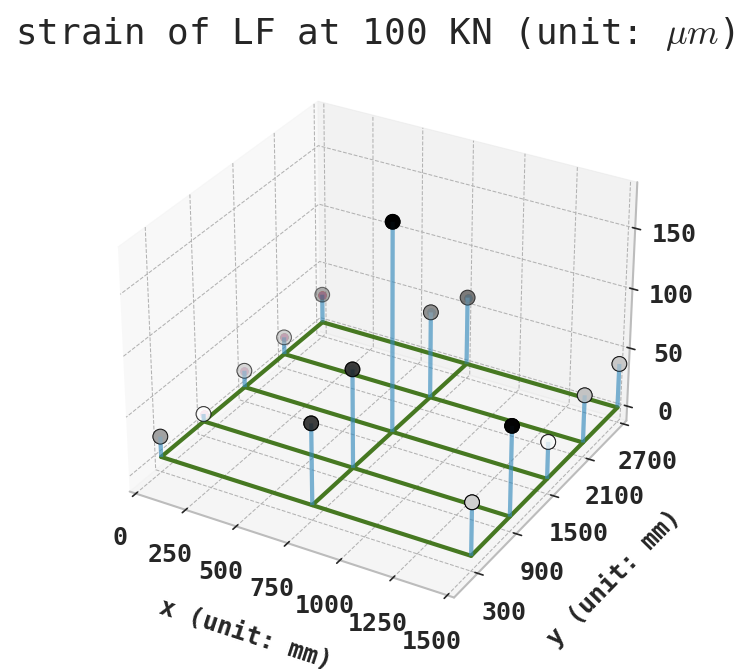

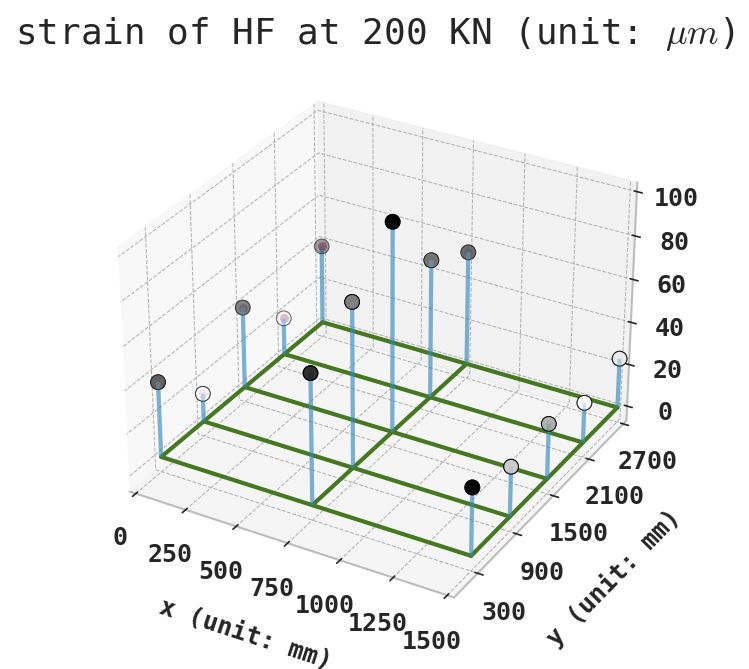

In [49]:
for ind in range(n_case):
    plot_sctter3D(df_test_set, f'LF{ind}', 'LF')
    plot_sctter3D(df_test_set, f'HF{ind}', 'HF')
    # plot_sctter3D(df_test_set, f'TDS{ind}', 'TDS')

In [50]:
strain

{'LF0':          0      x       y
 0    -7.02    0.0   300.0
 1     5.72   50.0   300.0
 2    -7.69  100.0   300.0
 3    -1.80  150.0   300.0
 4    20.70  200.0   300.0
 ..     ...    ...     ...
 300 -13.24  200.0  2700.0
 301  -3.75  150.0  2700.0
 302   1.77  100.0  2700.0
 303   1.17   50.0  2700.0
 304  -5.22    0.0  2700.0
 
 [305 rows x 3 columns],
 'HF':             0     x     y
 0   35.128287     0   300
 1   60.442194   750   300
 2   31.190314  1500   300
 3   13.219975     0   900
 4   76.403231   750   900
 5   23.110443  1500   900
 6   38.253702     0  1500
 7   97.142692   750  1500
 8   25.734554  1500  1500
 9   17.547885     0  2100
 10  64.969761   750  2100
 11  18.857373  1500  2100
 12  37.357563     0  2700
 13  53.785158   750  2700
 14  23.443573  1500  2700,
 'LF':          0       x       y
 0    17.33     0.0   300.0
 1    33.01    50.0   300.0
 2    24.00   100.0   300.0
 3    21.65   150.0   300.0
 4    30.99   200.0   300.0
 ..     ...     ...     ...
 